### **Supervised**: `Model Selection`

#### **1. Cross Validation**

When evaluating different settings hyperparameters for estimators, such as the alpha setting that must be manually set for a Logistic Regression, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can **leak** into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called **validation set**: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be dine on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets. The performance measure a reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data, which is a major advantage in problems such as inverse inference where the number of samples is very small.

In [1]:
import numpy as np

#define the feature

X_train = np.arange(30)
y_train = np.hstack(([0]*10, [1]*20))


print(len(X_train))

30


The following sections list utilities to generate indices that can be used to generate dataset splits according to different cross validation strategies.

**1.1 K-Fold**: divides all the samples in k groups of samples, called folds (if k=n, this is equivalent to the Leave One Out strategy), of equal sizes (if possible). The prediction function is learned using k-1 folds and the fold left out is used for test.

In [2]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5)
for train, validation in cv.split(X_train):
    print(f'{train}, {validation}')

[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29], [0 1 2 3 4 5]
[ 0  1  2  3  4  5 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29], [ 6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 18 19 20 21 22 23 24 25 26 27 28 29], [12 13 14 15 16 17]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 24 25 26 27 28 29], [18 19 20 21 22 23]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23], [24 25 26 27 28 29]


**1.2 Repeated K-Fold**: repeats K-Fold n times. It can be used when one requires to run KFold n times, producing different splits in each repetition.

In [3]:
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=5,n_repeats=2,random_state=42)
for train, validation in cv.split(X_train):
    print(f'{train}, {validation}')

[ 0  1  2  3  4  5  6  7 10 11 12 13 14 16 18 19 20 21 22 24 25 26 28 29], [ 8  9 15 17 23 27]
[ 1  2  3  5  6  7  8  9 10 11 13 14 15 17 18 19 20 21 22 23 25 26 27 29], [ 0  4 12 16 24 28]
[ 0  3  4  6  7  8  9 10 12 14 15 16 17 18 19 20 21 23 24 25 26 27 28 29], [ 1  2  5 11 13 22]
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 22 23 24 27 28], [ 3 18 21 25 26 29]
[ 0  1  2  3  4  5  8  9 11 12 13 15 16 17 18 21 22 23 24 25 26 27 28 29], [ 6  7 10 14 19 20]
[ 1  2  3  4  6  8  9 10 11 12 14 15 16 17 18 19 21 22 23 24 25 27 28 29], [ 0  5  7 13 20 26]
[ 0  1  2  3  4  5  6  7  8  9 11 13 14 15 16 17 18 19 20 23 25 26 27 28], [10 12 21 22 24 29]
[ 0  2  4  5  7  9 10 11 12 13 14 15 18 19 20 21 22 23 24 25 26 27 28 29], [ 1  3  6  8 16 17]
[ 0  1  3  5  6  7  8  9 10 12 13 14 15 16 17 20 21 22 24 25 26 27 28 29], [ 2  4 11 18 19 23]
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 16 17 18 19 20 21 22 23 24 26 29], [ 9 14 15 25 27 28]


**1.3 Shuffle Split K-Fold**: will generate a user defined number of independent train / test dataset splits. Samples are first shuffled and then split into a pair of train and test sets. This is a good alternative to KFold cross validation that allows a finer control on the number of iterations and the proportion of samples on each side of the train / test split.

In [4]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=.2,random_state=42)
for train, validation in cv.split(X_train):
    print(f'{train}, {validation}')

[28 24 12  0  4 16  5 13 11 22  1  2 25  3 21 26 18 29 20  7 10 14 19  6], [27 15 23 17  8  9]
[21 10 12 29 24 22 16  3  1 17  8  6 23  4  2 19 11 18 25 14 15 28 27  9], [ 0  5 20 26 13  7]
[29 26 15 28 24 23 18 12 21 19  9  5  1 22 27 17  3 16 13  2 14  7 11  6], [ 4 25 10  0  8 20]
[ 9 13 24  2 10 19 28 11 18  7 21  6  0 22 25  8 27 23 29 14 17 12 15 20], [ 3  1  4  5 16 26]
[22 14 12 17 19 13 21 18 10  5 24 23  2  4 15  0  1 11  7 27 29  8 25  6], [26  3 16 28  9 20]


Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use stratified sampling as implemented in StratifiedKFold and StratifiedShuffleSplit to ensure that relative class frequencies is approximately preserved in each train and validation fold.

**1.4 Stratified K-Fold**: is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set. Repeated can be used to repeat Stratified K-Fold n times with different randomization in each repetition.

In [5]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5)
for train, validation in cv.split(X_train,y_train):
    print(f'{train}, {validation}')

[ 2  3  4  5  6  7  8  9 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29], [ 0  1 10 11 12 13]
[ 0  1  4  5  6  7  8  9 10 11 12 13 18 19 20 21 22 23 24 25 26 27 28 29], [ 2  3 14 15 16 17]
[ 0  1  2  3  6  7  8  9 10 11 12 13 14 15 16 17 22 23 24 25 26 27 28 29], [ 4  5 18 19 20 21]
[ 0  1  2  3  4  5  8  9 10 11 12 13 14 15 16 17 18 19 20 21 26 27 28 29], [ 6  7 22 23 24 25]
[ 0  1  2  3  4  5  6  7 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25], [ 8  9 26 27 28 29]


**1.5 Stratified Shuffle Split**: is a variation of ShuffleSplit, which returns stratified splits, i.e which creates splits by preserving the same percentage for each target class as in the complete set.

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

cv = StratifiedShuffleSplit(n_splits=5, test_size=.2,random_state=42)
for train, validation in cv.split(X_train,y_train):
    print(f'{train}, {validation}')

[11 19  4 10 12  2 24  8  0  1 21 18 15  9 25  7  5 17 14 26 27 23 22 16], [ 3 28 13 29  6 20]
[ 8  3  0 12  5  1 27 10 20 25  9 17  2 29  4 23 26 14 22 16 21 18 24 28], [11 15  6 13 19  7]
[ 3 15  2 16 27 25  4 18  0  5 23 28 24 26 11 20 10  7  1 22  6 29 19 13], [ 8 17  9 12 21 14]
[13  4 23 14 24 17 10 20  5 19 15 21 28 11  3  1  8 16  7  2  0 25 27 26], [ 6 12 29  9 18 22]
[17  0  5  1 25  7 19 13 23 16 21 28 29 24 12  8 18  9  4 22 10  2 26 27], [20 14 11 15  3  6]


#### **2. Hyperparameters Tuning**

Hyper-parameters are parameters that are not directly learnt within estimators. Typical examples include max_depth for Decision Tree, alpha for Lasso, etc. It is possible and recommended to search the hyper-parameter space for the best cross validation score.

Two generic approaches to parameter search are provided in scikit-learn: for given values, **GridSearchCV** exhaustively considers all parameter combinations, while **RandomizedSearchCV** can sample a given number of candidates from a parameter space with a specified distribution. 

**Note**: that it is common that a small subset of those parameters can have a large impact on the predictive or computation performance of the model while others can be left to their default values. It is recommended to read the docstring of the estimator class to get a finer understanding of their expected behavior, possibly by reading the enclosed reference to the literature

In [7]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn. tree import DecisionTreeClassifier
import random

X,y = make_classification(n_samples=700, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=0,stratify=y)

model = DecisionTreeClassifier(random_state=0)

**2.1 Exhaustive Grid Search**, The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter. For instance, the following param_grid:

In [8]:
param_grid = {
    'max_depth': np.arange(1, 21),
    'min_samples_split': np.arange(5, 51, 5),
    'criterion': ['gini', 'entropy']
}

In [9]:
from sklearn.model_selection import GridSearchCV

tuned_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=1,
    cv=5
)

tuned_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'min_samples_split': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])},
             scoring='accuracy')

In [10]:
tuned_model.best_score_

0.9530612244897959

In [11]:
tuned_model.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 5}

In [12]:
import pandas as pd

pd.DataFrame(tuned_model.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
230,0.002860,0.003346,0.000000,0.000000,entropy,4,5,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.979592,0.918367,0.979592,0.938776,0.948980,0.953061,0.023800,1
242,0.002862,0.003329,0.001346,0.002692,entropy,5,15,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.979592,0.928571,0.969388,0.938776,0.948980,0.953061,0.018926,1
243,0.004112,0.003359,0.000000,0.000000,entropy,5,20,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.979592,0.928571,0.969388,0.938776,0.948980,0.953061,0.018926,1
240,0.004294,0.003515,0.000202,0.000404,entropy,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.948980,0.928571,0.969388,0.948980,0.959184,0.951020,0.013537,4
231,0.004178,0.003413,0.000000,0.000000,entropy,4,10,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.979592,0.918367,0.969388,0.928571,0.948980,0.948980,0.023269,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.001401,0.002627,0.000070,0.000141,entropy,2,10,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.928571,0.908163,0.969388,0.887755,0.908163,0.920408,0.027683,381
210,0.004083,0.003339,0.000053,0.000105,entropy,2,5,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.928571,0.908163,0.969388,0.887755,0.908163,0.920408,0.027683,381
209,0.000085,0.000169,0.000000,0.000000,entropy,1,50,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.928571,0.887755,0.969388,0.887755,0.928571,0.920408,0.030544,381
205,0.001364,0.002581,0.001375,0.002547,entropy,1,30,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.928571,0.887755,0.969388,0.887755,0.928571,0.920408,0.030544,381


**2.2 Randomized Parameter Optimization**, implements a randomized search over parameters, where each setting is sampled from a distribution over possible parameter values. This has two main benefits over an exhaustive search:

- A budget can be chosen independent of the number of parameters and possible values.
- Adding parameters that do not influence the performance does not decrease efficiency.

In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.

In [13]:
from sklearn.model_selection import RandomizedSearchCV

tuned_model = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    scoring='accuracy',
    n_jobs=1,
    n_iter=100,
    cv=5,
    random_state=0
)

tuned_model.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   n_iter=100, n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'min_samples_split': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])},
                   random_state=0, scoring='accuracy')

In [14]:
tuned_model.best_score_

0.9428571428571428

In [15]:
tuned_model.best_params_

{'min_samples_split': 20, 'max_depth': 4, 'criterion': 'entropy'}

In [16]:
pd.DataFrame(tuned_model.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
49,0.004211,0.005159,0.000000,0.000000,20,4,entropy,"{'min_samples_split': 20, 'max_depth': 4, 'cri...",0.948980,0.918367,0.969388,0.928571,0.948980,0.942857,0.017791,1
91,0.002000,0.004000,0.002000,0.004000,20,6,entropy,"{'min_samples_split': 20, 'max_depth': 6, 'cri...",0.948980,0.928571,0.969388,0.938776,0.928571,0.942857,0.015272,1
25,0.005985,0.004887,0.000000,0.000000,20,12,entropy,"{'min_samples_split': 20, 'max_depth': 12, 'cr...",0.948980,0.928571,0.959184,0.938776,0.928571,0.940816,0.011900,3
31,0.004015,0.004917,0.000000,0.000000,20,11,entropy,"{'min_samples_split': 20, 'max_depth': 11, 'cr...",0.948980,0.928571,0.959184,0.938776,0.928571,0.940816,0.011900,3
76,0.005182,0.004683,0.000000,0.000000,20,17,entropy,"{'min_samples_split': 20, 'max_depth': 17, 'cr...",0.948980,0.928571,0.959184,0.938776,0.928571,0.940816,0.011900,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.001909,0.002339,0.004225,0.004757,10,20,gini,"{'min_samples_split': 10, 'max_depth': 20, 'cr...",0.959184,0.887755,0.918367,0.918367,0.928571,0.922449,0.022908,90
53,0.006043,0.004935,0.000000,0.000000,10,18,gini,"{'min_samples_split': 10, 'max_depth': 18, 'cr...",0.959184,0.887755,0.918367,0.918367,0.928571,0.922449,0.022908,90
62,0.002019,0.004038,0.000000,0.000000,25,1,gini,"{'min_samples_split': 25, 'max_depth': 1, 'cri...",0.938776,0.887755,0.969388,0.887755,0.928571,0.922449,0.031352,90
18,0.002000,0.004000,0.000000,0.000000,35,1,entropy,"{'min_samples_split': 35, 'max_depth': 1, 'cri...",0.928571,0.887755,0.969388,0.887755,0.928571,0.920408,0.030544,99


### `Business Problem Understanding`

**Problem Statement**
Karena jumlah tips bervariasi, maka menentukan harga yang sesuai sangatlah penting bagi kesejahteraan karyawan.

**Goals**
Menentukan jumlah tip yang tepat untuk tiap customer yang berkunjung.

**Analytic Approach**
Jadi yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu customer dengan customer yang lain.

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu perusahaan untuk dapat menyediakan tool prediksi tip dari customer baru, yang mana akan berguna untuk meningkatkan kesejahteraan karyawan.

**Metric Evaluation**
Evaluasi metrik yang akan digunakan adalah MAE dan MSE. Semakin kecil nilai keduanya, berarti model semakin akurat dalam memprediksi harga tip sesuai dengan limitasi fitur yang digunakan.

Selain itu, kita juga bisa menurunkan nilai R-squared atau adj. R-squared untuk mengetahui seberapa baik model dapat mempresentasilam varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.



### `Data Understanding`

In [17]:
import pandas as pd
data = pd.read_csv('../../csv/white_wine.csv')
print(f'Jumlah baris dan kolom: {data.shape}')

data.head()

Jumlah baris dan kolom: (520, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [18]:
pd.DataFrame({
    'feature': data.columns.values,
    'data_type': data.dtypes.values,
    'null': data.isna().mean().values * 100,
    'negative': [True if data[col].dtype == int and (data[col] < 0).any() else False for col in data.columns],
    'n_unique': data.nunique().values,
    'min': data.min().values,
    'max': data.max().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

,feature,data_type,null,negative,n_unique,min,max,sample_unique
0,fixed acidity,float64,0.000000,False,41,5.0000,10.2000,"[7.0, 6.3, 8.1, 7.2, 6.2, 8.6, 7.9, 6.6, 8.3, ..."
1,volatile acidity,float64,0.000000,False,69,0.1000,0.9050,"[0.27, 0.3, 0.28, 0.23, 0.32, 0.22, 0.18, 0.16..."
2,citric acid,float64,0.000000,False,59,0.0000,0.8800,"[0.36, 0.34, 0.4, 0.32, 0.16, 0.43, 0.41, 0.37..."
3,residual sugar,float64,0.000000,False,160,0.8000,22.0000,"[20.7, 1.6, 6.9, 8.5, 7.0, 1.5, 1.45, 4.2, 1.2..."
4,chlorides,float64,0.000000,False,67,0.0200,0.3460,"[0.045, 0.049, 0.05, 0.058, 0.044, 0.033, 0.03..."
5,free sulfur dioxide,float64,0.000000,False,81,3.0000,131.0000,"[45.0, 14.0, 30.0, 47.0, 28.0, 11.0, 17.0, 16...."
6,total sulfur dioxide,float64,0.000000,False,168,41.0000,313.0000,"[170.0, 132.0, 97.0, 186.0, 136.0, 129.0, 63.0..."
7,density,float64,0.000000,False,100,0.9899,1.0033,"[1.001, 0.994, 0.9951, 0.9956, 0.9949, 0.9938,..."
8,pH,float64,0.192308,False,69,2.8700,3.7200,"[3.0, 3.3, 3.26, 3.19, 3.18, 3.22, 2.99, 3.14,..."
9,sulphates,float64,0.192308,False,54,0.2700,0.8500,"[0.45, 0.49, 0.44, 0.4, 0.47, 0.56, 0.53, 0.63..."


**Insight**

- Dataset terdiri dari 520 baris dan 12 kolom.
- Semua variabel tergolong numerikal dan continous, kecuali quality yaitu diskrit
- Format data dari variabel quality seharusnya integer
- Skala dari variabel total sulfur dioxide dan free sulfur dioxide lebih besar dibanding yang lain.

### `Data Preparation`

In [19]:
df = data[['alcohol', 'density', 'quality']].copy()
df.sample(5)

,alcohol,density,quality
173,11.5,0.9968,7.0
394,8.8,0.9976,5.0
417,9.0,0.9959,5.0
342,9.1,0.9962,6.0
311,12.5,0.9968,8.0


`Duplicates`

**Duplicated Value**, Deteksi dan kuantifikasi duplikasi data

In [20]:
print(f"Jumlah duplikasi data: {df[df.duplicated()].shape}")

Jumlah duplikasi data: (115, 3)


Sebesar 22% data terindikasi duplikat, maka hilangkan salah satunya.

Handling duplikasi data:

In [21]:
df.drop_duplicates(keep='last', inplace=True, ignore_index=True)

`Missing Values`

Deteksi dan kuantifikasi missing value

<Axes: >

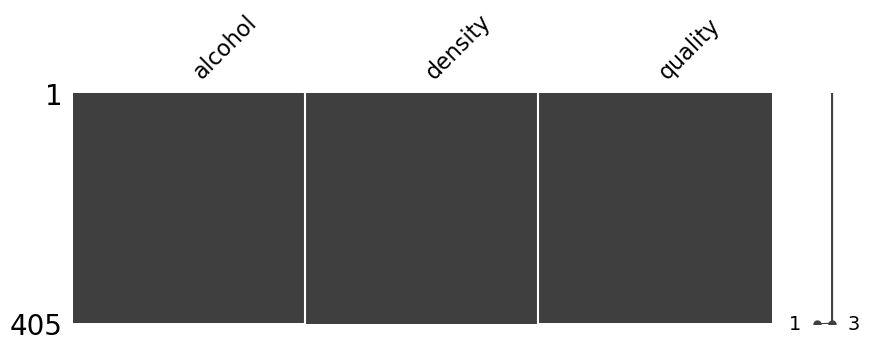

In [22]:
import missingno as msn  

msn.matrix(df, figsize=(10,3))

In [23]:
pd.DataFrame({'null': [df[col].isna().sum() for col in df.columns]}, index=df.columns.values)

,null
alcohol,1
density,0
quality,1


Dua variabel (alcohol, quality) berisi 1 point data atau 0.2% missing value.

Handling missing value:

In [24]:
df.dropna(inplace=True)

`Rare Labels`

Deteksi dan kuantifikasi rare value:

In [25]:
pd.DataFrame(df['quality'].value_counts(normalize=True) * 100).round(2)

,proportion
quality,
6.0,45.05
5.0,31.44
7.0,15.10
4.0,4.21
8.0,3.22
3.0,0.99


Lebih dari 50% didominasi oleh anggur dengan kualitas lebih dari 6.

Handling rare value:

In [26]:
import numpy as np  

df['quality'] = df['quality'].apply(lambda x: np.where(x > 6, 1, 0))

`Outliers`

Deteksi dan kuantifikasi outlier:

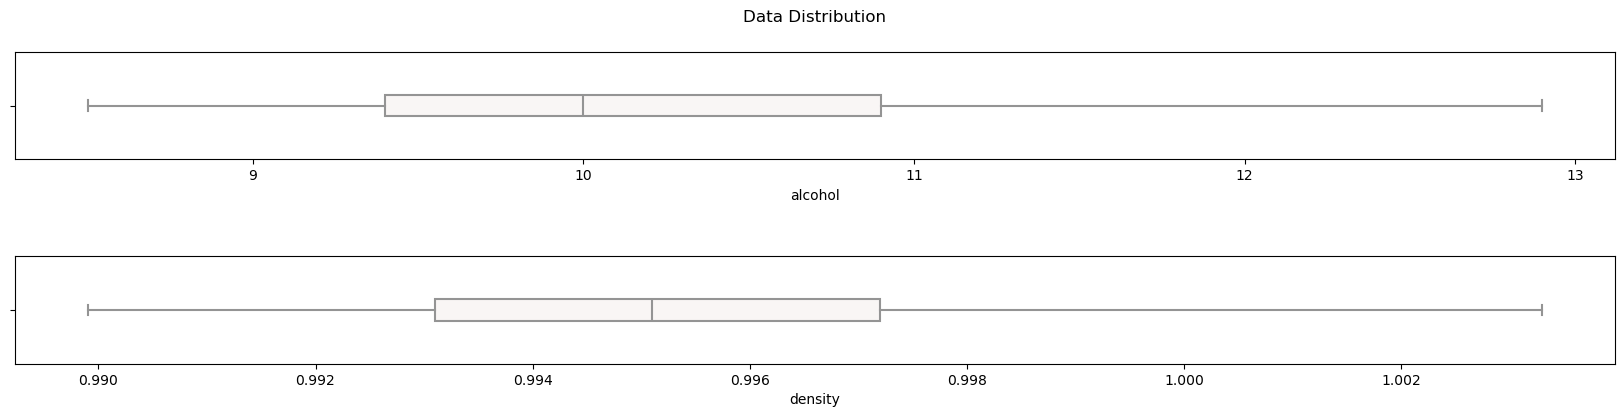

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(20, 4))

sns.boxplot(x='alcohol', data=df, width=.2, palette="vlag", ax=ax[0])
sns.boxplot(x='density', data=df, width=.2, palette="vlag", ax=ax[1])

ax[0].set_title("Data Distribution", y=1.2)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, wspace=0.1, hspace=0.9)
plt.show()


In [28]:
# Perform iqr for outlier detection

Q1 = df['density'].quantile(0.25)
Q3 = df['density'].quantile(0.75)
IQR = Q3 - Q1 

n_outlier = df['density'] >= (Q3 + 1.5*IQR)
df[n_outlier].shape

(0, 3)

Tidak terdapat outlier pada variabel density.

`Imbalance Data`

Deteksi dan kuantifikasi proporsi label target

In [29]:
df['quality'].value_counts(normalize=True) * 100

quality
0    81.683168
1    18.316832
Name: proportion, dtype: float64

Persentase jumlah label 0 (81.6%) lebih banyak dibandingkan label 1 (18.2%), ini termasuk imbalance.

`Check Multicollinearity`

Deteksi multicollinearity antar fitur dengan VIF.

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

X = df.drop(columns='quality')
y = df['quality']

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Feature"] =  X.columns

vif.round(2)

,VIF Factor,Feature
0,88.56,alcohol
1,88.56,density


Terdapat multicollinearity antara fitur alcohol dan density. Saat menggunakan model linear, multicollinearity seharusnya dihindari. Namun untuk studi kasus ini kita akan pertahankan dahulu.

**Feature Engineering**

Bagi dataset menjadi train dan test set.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=0,stratify=y)

X_train.shape, y_train.shape



((282, 2), (282,))

### `Model Experiment`

Setting parameter dasar untuk menginisialisasi experiment 

In [32]:
from sklearn. linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn. tree import DecisionTreeClassifier

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
logreg = LogisticRegression(max_iter = 100)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=0)

**Benchmark Model**

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Daftar model
models = [logreg, knn, dt]

accuracy_mean = []
std_mean = []
all_accuracy = []
model_name = []

for model in models:
    # Buat pipeline
    model_pipeline = Pipeline([
        ('scaling', scaler),
        ('modeling', model)
    ])

    # Definisikan cross-validation
    sk = StratifiedKFold(n_splits=5)

    # Hitung cross-validation score
    model_cv = cross_val_score(
        model_pipeline,
        X_train,
        y_train,
        cv=sk,
        scoring='accuracy'
    )

    # Simpan hasil
    accuracy_mean.append(model_cv.mean())
    std_mean.append(model_cv.std())
    all_accuracy.append(model_cv.round(4))
    model_name.append(model.__class__.__name__)

In [34]:
pd.DataFrame({
    'model' : model_name,
    'mean' : accuracy_mean,
    'std' : all_accuracy,
    'all score' : all_accuracy
})

,model,mean,std,all score
0,LogisticRegression,0.946805,"[0.9474, 0.9474, 0.9643, 0.9107, 0.9643]","[0.9474, 0.9474, 0.9643, 0.9107, 0.9643]"
1,KNeighborsClassifier,0.960965,"[0.9649, 0.9649, 0.9821, 0.9286, 0.9643]","[0.9649, 0.9649, 0.9821, 0.9286, 0.9643]"
2,DecisionTreeClassifier,0.925439,"[0.9474, 0.9298, 0.8929, 0.8929, 0.9643]","[0.9474, 0.9298, 0.8929, 0.8929, 0.9643]"


**Insight**

- Kita melakukan modelling menggunakan 3 algoritma ML yang berbeda yaitu LogisticRegression, KNN, dan Decision Tree
- Kita juga melakukan cross validation dengan 5 fold
- Metric yang kita gunakan adalah accuracy.
- Kita menetukan model terbaik berdasarkan:
    - mean accuracy tertinggi (performa modelnya bagus)
    - std accuracy terendah (perform modelnya stabil)
- Benchmark model terbaik adalah KNeighborsClassifier
- Maka kita akan menggunakan KNeighborsClassifier untuk melakukan prediksi ke test set.

*Predict Benchmark Model to Test Set*

Untuk mengukur performa akhir model

In [35]:
from sklearn.metrics import accuracy_score

model_pipeline = Pipeline([
        ('scaling', scaler),
        ('modeling', knn)
])

# Fit model pada data pelatihan
model_pipeline.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model_pipeline.predict(X_test)

# Hitung akurasi
score = accuracy_score(y_test, y_pred)

print(f'Akurasi pada test set {score}')

Akurasi pada test set 0.9672131147540983


Performa akhir model sebesar 96.72%.

**Hyperparameter Tuning**

In [36]:
param_grid = {
    'modeling_metric' : ['minkowski', 'euclidean'],
    'modeling_weights' : ['uniform', 'distance'],
    'modeling_n_neighbors' : range(3,30,2)
}

In [37]:
knn = KNeighborsClassifier()

model_pipeline = Pipeline([
    ('scaling',scaler),
    ('modeling',knn)
])

skfold = StratifiedKFold(n_splits=5)

tunel_model = RandomizedSearchCV(
    estimator=model_pipeline,
    param_distributions=param_grid,
    cv=skfold,
    scoring='accuracy',
    n_jobs=1,
    n_iter = 30,
    random_state=0
)

In [38]:
tuned_model.best_params_

{'min_samples_split': 20, 'max_depth': 4, 'criterion': 'entropy'}

In [39]:
tuned_model.best_score_

0.9428571428571428

*Predict Tuned Model to Test Set*

In [40]:
# best_model = KNeighborsClassifier(weights='uniform',n_neighbors=3, metric='euclidean')
# tuned_model.predict(X_test)

best_model = tuned_model.best_estimator_
best_model.fit(X_train,y_train)

y_pred = best_model.predict(X_test)

score = accuracy_score(y_test,y_pred)
print(score)


0.9672131147540983


| Accuracy Score | Train Set | Test Set |
| --- | --- | --- |
| Before Tuning | 0.961 | 0.967 |
| After Tuning | 0.964 | 0.984 |

**Insight**

- Model yang terpilih untuk melakukan modeling pada dataset ini adalah **K-Nearest Neighbors (KNN)**.
- Hyperparameter tuning **berhasil meningkatkan** performa model KNN berdasarkan accuracy. 
- Hyperparameter terbaik berdasarkan RandomizedSearch adalah **{'model__weights': 'uniform', 'model__n_neighbors': 3, 'model__metric': 'minkowski'}**
- Jika masih ingin mencoba meng-improve model KNN ini, kita bisa coba melakukan :
    - Atur ulang nilai yang dimasukkan pada hyperparameter.
    - Ganti algoritma ML.
    - Feature Engineering.
    - Tambah hyperparameter.